In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/LLM_MODEL_CLASSIFCATION (1)

Mounted at /content/drive
/content/drive/My Drive/LLM_MODEL_CLASSIFCATION (1)


In [2]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import keras
import pandas as pd
import tensorflow as tf
import transformers
from sklearn.model_selection import train_test_split
import zipfile
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [3]:
dataset = pd.read_csv("emotion_dataset_results.csv",encoding="ISO-8859-1")
dataset

,label,textual_description,enhanced_textual_description
0,angry,"vattene, sitalmente stupido","vattene, sitalmente stupido, sic dell'arte, s..."
1,angry,sta millontando! Coyone!,sta millontando! Coyone! Coyone! Coyone! Coyo...
2,angry,ma di cosa cazzo stai parlando,ma di cosa cazzo stai parlando.\n\nThe first ...
3,disguise,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...
4,disguise,Fucking bitches! Ich kann auch wut's dir vous...,Fucking bitches! Ich kann auch wut's dir vous...
...,...,...,...
185,surprise,What? Am I the winner?,What? Am I the winner?\n\nI'm not. I'm not. I...
186,surprise,Really? I can't believe it!,Really? I can't believe it! I'm so sorry! I'm...
187,surprise,What? Is that true?,What? Is that true?\n\nI'm not sure. I'm not ...
188,surprise,Really? I sure?,Really? I sure?\n\nI'm not sure what to say.\...


In [4]:
dataset['label'].value_counts()

,count
label,
disguise,37
sad,34
fear,33
surprise,30
happy,29
angry,27


In [5]:
set(dataset['label'].values.tolist())

{'angry', 'disguise', 'fear', 'happy', 'sad', 'surprise'}

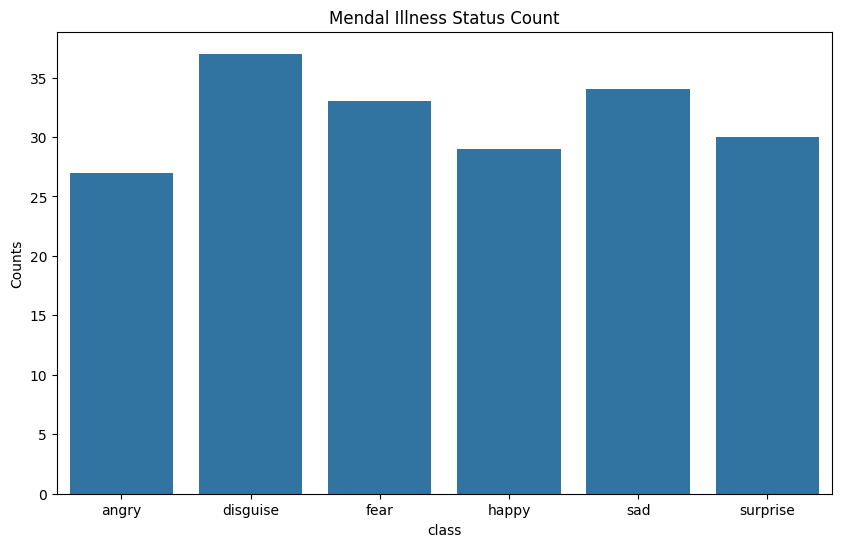

In [6]:
plt.figure(figsize = (10,6))
sns.countplot(data = dataset,x = "label")
plt.title("Mendal Illness Status Count")
plt.xlabel("class")
plt.ylabel("Counts")
plt.show()

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data (only needed once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 5. Remove stopwords and perform lemmatization
    tokens = text.split()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # 6. Join tokens back into a single string
    processed_text = ' '.join(processed_tokens)

    return processed_text
x = dataset['enhanced_textual_description'].values
preprocess=[]
for i in x:
    preprocess.append(preprocess_text(i))
dataset['preprocess']=preprocess
dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,label,textual_description,enhanced_textual_description,preprocess
0,angry,"vattene, sitalmente stupido","vattene, sitalmente stupido, sic dell'arte, s...",vattene sitalmente stupido sic dellarte sic de...
1,angry,sta millontando! Coyone!,sta millontando! Coyone! Coyone! Coyone! Coyo...,sta millontando coyone coyone coyone coyone co...
2,angry,ma di cosa cazzo stai parlando,ma di cosa cazzo stai parlando.\n\nThe first ...,di cosa cazzo stai parlando first time saw new...
3,disguise,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...,person seems displaying angry emotion
4,disguise,Fucking bitches! Ich kann auch wut's dir vous...,Fucking bitches! Ich kann auch wut's dir vous...,fucking bitch ich kann auch wuts dir vous weil...
...,...,...,...,...
185,surprise,What? Am I the winner?,What? Am I the winner?\n\nI'm not. I'm not. I...,winner im im im im im im im im im im im im im ...
186,surprise,Really? I can't believe it!,Really? I can't believe it! I'm so sorry! I'm...,really cant believe im sorry im sorry im sorry...
187,surprise,What? Is that true?,What? Is that true?\n\nI'm not sure. I'm not ...,true im sure im sure true im sure true im sure...
188,surprise,Really? I sure?,Really? I sure?\n\nI'm not sure what to say.\...,really sure im sure say im sure say im sure sa...


In [8]:
#Encode label for easy identification.
dataset['encoded_cat'] = dataset['label'].astype('category').cat.codes
dataset

,label,textual_description,enhanced_textual_description,preprocess,encoded_cat
0,angry,"vattene, sitalmente stupido","vattene, sitalmente stupido, sic dell'arte, s...",vattene sitalmente stupido sic dellarte sic de...,0
1,angry,sta millontando! Coyone!,sta millontando! Coyone! Coyone! Coyone! Coyo...,sta millontando coyone coyone coyone coyone co...,0
2,angry,ma di cosa cazzo stai parlando,ma di cosa cazzo stai parlando.\n\nThe first ...,di cosa cazzo stai parlando first time saw new...,0
3,disguise,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...,person seems displaying angry emotion,1
4,disguise,Fucking bitches! Ich kann auch wut's dir vous...,Fucking bitches! Ich kann auch wut's dir vous...,fucking bitch ich kann auch wuts dir vous weil...,1
...,...,...,...,...,...
185,surprise,What? Am I the winner?,What? Am I the winner?\n\nI'm not. I'm not. I...,winner im im im im im im im im im im im im im ...,5
186,surprise,Really? I can't believe it!,Really? I can't believe it! I'm so sorry! I'm...,really cant believe im sorry im sorry im sorry...,5
187,surprise,What? Is that true?,What? Is that true?\n\nI'm not sure. I'm not ...,true im sure im sure true im sure true im sure...,5
188,surprise,Really? I sure?,Really? I sure?\n\nI'm not sure what to say.\...,really sure im sure say im sure say im sure sa...,5


In [9]:
dataset= dataset.dropna()
dataset

,label,textual_description,enhanced_textual_description,preprocess,encoded_cat
0,angry,"vattene, sitalmente stupido","vattene, sitalmente stupido, sic dell'arte, s...",vattene sitalmente stupido sic dellarte sic de...,0
1,angry,sta millontando! Coyone!,sta millontando! Coyone! Coyone! Coyone! Coyo...,sta millontando coyone coyone coyone coyone co...,0
2,angry,ma di cosa cazzo stai parlando,ma di cosa cazzo stai parlando.\n\nThe first ...,di cosa cazzo stai parlando first time saw new...,0
3,disguise,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...,æãã¨â¦ããããããå¨åã«ã¢ã¼ã...,person seems displaying angry emotion,1
4,disguise,Fucking bitches! Ich kann auch wut's dir vous...,Fucking bitches! Ich kann auch wut's dir vous...,fucking bitch ich kann auch wuts dir vous weil...,1
...,...,...,...,...,...
185,surprise,What? Am I the winner?,What? Am I the winner?\n\nI'm not. I'm not. I...,winner im im im im im im im im im im im im im ...,5
186,surprise,Really? I can't believe it!,Really? I can't believe it! I'm so sorry! I'm...,really cant believe im sorry im sorry im sorry...,5
187,surprise,What? Is that true?,What? Is that true?\n\nI'm not sure. I'm not ...,true im sure im sure true im sure true im sure...,5
188,surprise,Really? I sure?,Really? I sure?\n\nI'm not sure what to say.\...,really sure im sure say im sure say im sure sa...,5


In [10]:
dataset['encoded_cat'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [11]:
data_texts = dataset["preprocess"]
data_labels = dataset["encoded_cat"]

In [12]:
from sklearn.model_selection import train_test_split

# Split Train and Validation data
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size=0.2, random_state=0, shuffle=True)

# Keep some data for inference (testing)
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.01, random_state=0, shuffle=True)

In [13]:
train_texts = list(map(str, train_texts))
val_texts = list(map(str, val_texts))
test_texts = list(map(str, test_texts))

In [14]:
import pickle

# Saving the data to a pickle file
with open('testtext.pkl', 'wb') as file:
    pickle.dump(train_texts, file)
with open('testlabel.pkl', 'wb') as file:
    pickle.dump(train_labels, file)

In [15]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [17]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [18]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  4614      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66958086 (255.42 MB)
Trainable params: 66958086 (255.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history=model.fit(train_dataset.shuffle(10).batch(8),
          epochs=10,
          batch_size=8,
          validation_data=val_dataset.shuffle(10).batch(8),
         callbacks=[early_stopping])


Epoch 1/10
19/19 [==============================] - 172s 8s/step - loss: 1.8080 - accuracy: 0.1733 - val_loss: 1.7394 - val_accuracy: 0.2895
Epoch 2/10
19/19 [==============================] - 166s 9s/step - loss: 1.6708 - accuracy: 0.4333 - val_loss: 1.6060 - val_accuracy: 0.4737
Epoch 3/10
19/19 [==============================] - 151s 8s/step - loss: 1.4179 - accuracy: 0.5933 - val_loss: 1.4316 - val_accuracy: 0.5526
Epoch 4/10
19/19 [==============================] - 147s 8s/step - loss: 1.0753 - accuracy: 0.7733 - val_loss: 1.3031 - val_accuracy: 0.5789
Epoch 5/10
19/19 [==============================] - 148s 8s/step - loss: 0.7356 - accuracy: 0.8400 - val_loss: 1.1543 - val_accuracy: 0.5263
Epoch 6/10
19/19 [==============================] - 147s 8s/step - loss: 0.4581 - accuracy: 0.9067 - val_loss: 1.0557 - val_accuracy: 0.6316
Epoch 7/10
19/19 [==============================] - 153s 8s/step - loss: 0.2887 - accuracy: 0.9333 - val_loss: 1.0228 - val_accuracy: 0.6842
Epoch 8/10
19

In [ ]:
save_directory = "model" # Change this to your preferred location

model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

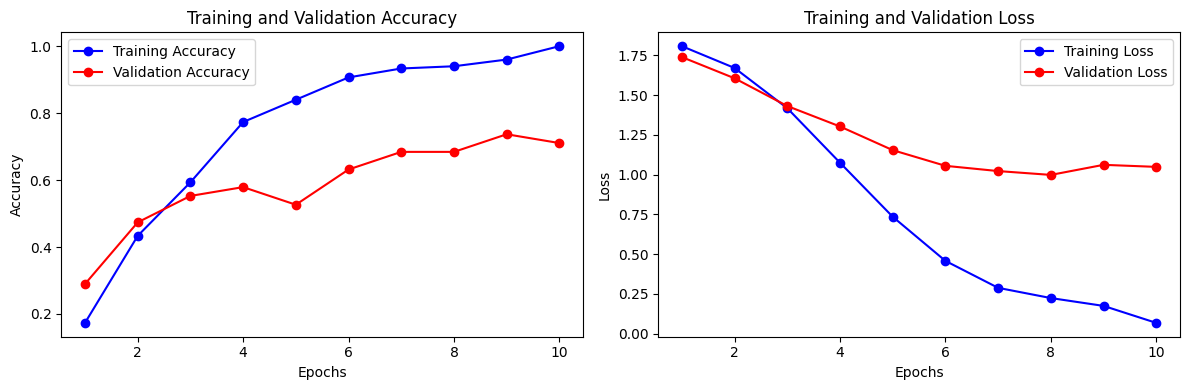

In [ ]:
import matplotlib.pyplot as plt
train_accuracy=[]
val_accuracy=[]
train_loss=[]
val_loss=[]

train_accuracy.extend(history.history['accuracy'])
val_accuracy.extend(history.history['val_accuracy'])
train_loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])

epochs = range(1, len(train_accuracy) + 1)
# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs,train_accuracy , 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs,train_loss , 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()